In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
import scipy.special
from mpmath import *
import random
import time

We ask for $n \geq 10$.

In [2]:
n=10_000_000

In [3]:
def find_the_mode(n):
    return math.ceil(sqrt(n))


m = find_the_mode(n)

print(m)

3163


In [4]:
def compute_Bl_n_tilde (n): #F_n_tilde is above F_n for n >= 10
    if n == 0 :
        return(1)
    else: return(mp.power(n,n-1/4)*mp.exp(-1/2+2*mp.sqrt(n)-n)/mp.sqrt(2))

In [5]:
Bl = compute_Bl_n_tilde(n)

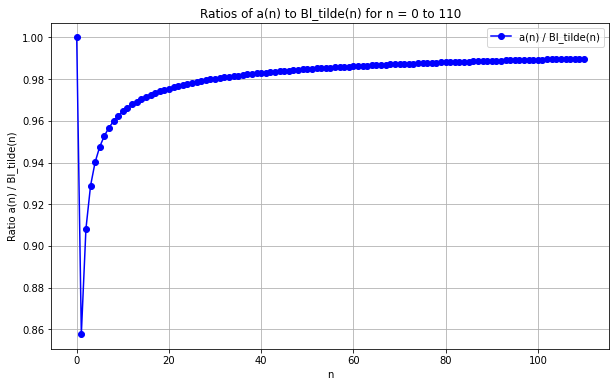

In [6]:
#To convince oneself the Bl_tilde are above A000262(n)
import numpy as np
import matplotlib.pyplot as plt
from math import comb  # For binomial coefficients

# Step 1: Compute a(n) using dynamic programming
def compute_a(n_max):
    a = [0] * (n_max + 1)
    a[0] = 1  # Base case
    a[1] = 1


    for n in range(1, n_max + 1):
        a[n] = (2*n-1)*a[n-1] - (n-1)*(n-2)*a[n-2]
    
    return a


# Step 3: Compute the first 110 values of a(n) and the ratios
n_max = 110
a_values = compute_a(n_max)
Bl_tilde_values = [compute_Bl_n_tilde(n) for n in range(n_max + 1)]
ratios = [(a_values[n] / Bl_tilde_values[n]) for n in range(n_max + 1)]

# Step 4: Plot the ratios
plt.figure(figsize=(10, 6))
plt.plot(range(n_max + 1), ratios, marker='o', linestyle='-', color='b', label='a(n) / Bl_tilde(n)')
plt.xlabel('n')
plt.ylabel('Ratio a(n) / Bl_tilde(n)')
plt.title('Ratios of a(n) to Bl_tilde(n) for n = 0 to 110')
plt.grid(True)
plt.legend()
plt.show()

In [7]:
def g_int (m,n):
    if m <= 0 : return(0)
    return(mp.rf(m, n)/(mp.fac(m)))

def g_function (x,m,n):
    g_m = g_int(m,n)
    Bl_n_tilde = compute_Bl_n_tilde(n)
    facteur = mp.exp(1-g_m*(mp.absmax(x-m)-mp.mpf('0.5'))/(mp.exp(1)*Bl_n_tilde))
    if facteur < 1 : 
        return(g_m*facteur)
    else:
        return(g_m)

In [8]:
def tirer_Y (n,m):
    g_m = g_int (m,n)
    Bl_n_tilde = compute_Bl_n_tilde(n)
    bern = random.random()
    if bern < 2/(g_m/(mp.exp(1)*Bl_n_tilde)+4) : #on est dans l'un des deux cotés
        dg = random.randint(1,2)
        expdistribution = mp.mpf('-1')*mp.log(random.random())*mp.exp(1)*Bl_n_tilde/g_m
        if dg == 1 : return(m + 0.5 + mp.exp(1)*Bl_n_tilde/g_m + expdistribution)
        else : return(m -0.5 - mp.exp(1)*Bl_n_tilde/g_m - expdistribution)
    else:
        return(m + (1 - 2*random.random())*(mp.mpf('0.5') + mp.exp(1)*Bl_n_tilde/g_m))

In [9]:
def tirer_k (n,m):
    b = True
    while b :
        Y = tirer_Y(n,m)
        X = round(Y)
        if random.random()*g_function(Y,m,n) < g_int(X,n):
            b = False
    return(X)

If one wants to look at the distribution of $Y$ and $U$.

In [10]:
# results = [tirer_k(n,m) for _ in range(1000)]
# results2 = [round(tirer_Y(n,m)) for _ in range(1000)]
# # Calculate the mean and standard deviation
# # mean = np.mean(results)
# # std_dev = np.std(results)

# # print(f"Mean of outcomes: {mean}")
# # print(f"Standard deviation of outcomes: {std_dev}")


# # Plot the histogram
# plt.hist(results, bins=30, density=True, alpha=0.6, color='g', label='Outcomes')
# plt.hist(results2, bins=30, density=True, alpha=0.6, color='b', label='r2')

# # # Overlay the expected Gaussian distribution
# # x = np.linspace(min(results), max(results), 1000)
# # gaussian = (1 / (std_dev * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean) / std_dev) ** 2)
# # plt.plot(x, gaussian, 'r-', label='Gaussian Fit')

# # # Add labels and legend
# plt.xlabel('Outcome')
# plt.ylabel('Density')
# plt.title('Distribution of tirer_W1() Outcomes')
# plt.legend()

# # Show the plot
# plt.show()

In [11]:
import random

def generate_linear_subsets_optimized(n, U):
    """
    Generates a weak ordering of n elements into U piles efficiently using dictionaries and doubly linked lists.
    
    Parameters:
        n (int): The number of elements to distribute.
        U (int): The number of piles (urns).
        
    Returns:
        list: A list of piles, where each pile is represented as a list of elements.
    """
    # Initialize U empty piles as doubly linked lists
    piles = [{} for _ in range(U)]  # Each pile is a dictionary representing a doubly linked list
    
    # Track the first and last elements of each pile
    first_elements = [None] * U  # First element in each pile
    last_elements = [None] * U  # Last element in each pile
    
    # Track the pile and neighbors of each element
    element_to_pile = {}  # Maps element to its pile index
    element_to_prev = {}  # Maps element to its previous element in the pile
    element_to_next = {}  # Maps element to its next element in the pile
    
    # Sequentially insert elements into piles
    for k in range(1, n + 1):
        # Calculate the number of available positions: U + (k - 1)
        available_positions = U + (k - 1)
        
        # Randomly select a position uniformly among the available positions
        selected_position = random.randint(0, available_positions - 1)
        
        if selected_position < U:
            # Place the element on top of a pile
            pile_index = selected_position
            if first_elements[pile_index] is None:
                # Pile is empty, set as first and last element
                first_elements[pile_index] = k
                last_elements[pile_index] = k
                element_to_next[k] = None
            else:
                # Insert at the top of the pile
                element_to_next[k] = first_elements[pile_index]
                element_to_prev[first_elements[pile_index]] = k
                first_elements[pile_index] = k
            element_to_pile[k] = pile_index
            element_to_prev[k] = None
        else:
            # Place the element below an existing element in a pile
            # The position corresponds to (selected_position - U) + 1
            remaining_position = selected_position - U + 1
            
            # Find the element after which to insert
            # Since we have a dictionary, we can directly access the element
            # by iterating through the piles and counting positions

            
            pile_index = element_to_pile[remaining_position]
            current_element = remaining_position
            # Insert after this element
            next_element = element_to_next.get(current_element, None)
            element_to_next[k] = next_element
            element_to_prev[k] = current_element
            if next_element:
                element_to_prev[next_element] = k
            else:
                last_elements[pile_index] = k
            element_to_next[current_element] = k
            element_to_pile[k] = pile_index
    
    # Convert the doubly linked lists back to lists for readability
    result = []
    for pile_index in range(U):
        current_element = first_elements[pile_index]
        pile_list = []
        while current_element:
            pile_list.append(current_element)
            current_element = element_to_next.get(current_element, None)
        if pile_list:
            result.append(pile_list)
    
    return result

# # Example usage
# n = 1_000_000  # Number of elements
# U = find_the_mode(n)  # Number of piles
# linear_subsets = generate_linear_subsets_optimized(n, U)
# print(len(linear_subsets))

In [12]:
#Le temps d'execution grandit de manière simili lineaire jusqu'à n de l'ordre de 30/40 millions puis ça explose
n = 1_000_000
debut = time.time()

m = find_the_mode(n)
k = tirer_k(n,m)

print("There are",k,"urns")

apres_k = time.time()

print("Time to sample U : " , apres_k - debut)

linear_subsets = generate_linear_subsets_optimized(n,k)
print("First equivalence class : ",linear_subsets[0])
print("Number of subsets : ",len(linear_subsets))

fin = time.time()


print("Total time of the procedure : ",fin - apres_k)

There are 1003 urns
Time to sample U :  0.009737253189086914
First equivalence class :  [542103, 293060, 893470, 127709, 428517, 28553, 950002, 714344, 721005, 214219, 702135, 231683, 191382, 436293, 277754, 176777, 580420, 46838, 839823, 531889, 327129, 596434, 954931, 141367, 179144, 268323, 83263, 782930, 361148, 487193, 513183, 405340, 724275, 29972, 423882, 435055, 988537, 400355, 660526, 17425, 191770, 830894, 212665, 536027, 451636, 544970, 312599, 65317, 373957, 795698, 589961, 599161, 373929, 68741, 144908, 230288, 257907, 301281, 916425, 648941, 26463, 784113, 634532, 467328, 596676, 410769, 517172, 129569, 356532, 153813, 160592, 985534, 367936, 461870, 275004, 240377, 448973, 908709, 64699, 580852, 293084, 964019, 901998, 367709, 389309, 202735, 855489, 49101, 178710, 863014, 182392, 469404, 399840, 61525, 54240, 619867, 250724, 101761, 549934, 93735, 852038, 892214, 718718, 759969, 534506, 418822, 655933, 639779, 623530, 14658, 553233, 704079, 965802, 407121, 594806, 98038